## Installing the Dependencies

In [1]:
! pip install langgraph


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


## Importing the dependencies

In [2]:
from langgraph.graph import StateGraph, END
from typing import TypedDict
from IPython.display import Image, display

## Defining the State and  Creating nodes


In [3]:
class IterState(TypedDict):
    counter: int

def increment(state: IterState) -> IterState:
    state["counter"] += 1
    print(f"🔁 Counter at: {state['counter']}")
    return state

def check_done(state: IterState) -> IterState:
    return state

# Router must return a *string key* that matches the mapping
def route(state: IterState) -> str:
    return "loop" if state["counter"] < 3 else "stop"

## Constructing the Workflow by adding nodes and edges

In [ ]:
# Build graph
graph = StateGraph(IterState)
graph.add_node("increment", increment)
graph.add_node("check_done", check_done)

graph.set_entry_point("increment")
graph.add_edge("increment", "check_done")

# Conditional edges with string keys
graph.add_conditional_edges(
    "check_done",
    route,
    {
        "loop": "increment",
        "stop": END,
    },
)

























## Compiling the Workflow

In [ ]:
app = graph.compile()










from langgraph.checkpoint.memory import MemorySaver


# --- Use MemorySaver as checkpointer ---
checkpointer = MemorySaver()
app = app.compile(checkpointer=checkpointer)


# --- Run workflow ---
final_state = app.invoke({"results": []}, config={"configurable": {"thread_id": "demo"}})

print("Final State:", final_state)










## Visual Representation of the Workflow

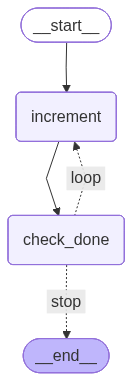

In [6]:
display(Image(data=app.get_graph().draw_mermaid_png()))


## Final Execution

In [7]:
state = {"counter": 0}
app.invoke(state)

🔁 Counter at: 1
🔁 Counter at: 2
🔁 Counter at: 3


{'counter': 3}